In [2]:
import pandas as pd

In [6]:
archivos_csv = ['Babasquillo.csv', 'Balao.csv', 'Beaterio.csv', 'Guajalo.csv', 'Monteverde.csv', 'Riobamba.csv']

for archivo in archivos_csv:
    try:
        df = pd.read_csv(archivo)

        columnas_necesarias = ['dni', 'ghi', 'period_end']
        if all(columna in df.columns for columna in columnas_necesarias):
            # Convertir la columna 'period_end' a formato datetime
            df['period_end'] = pd.to_datetime(df['period_end'])
            
            # Seleccionar solo las columnas necesarias
            df = df[['dni', 'ghi', 'period_end', 'period']]
            
            # Ordenar por 'period_end' si el formato de 'period_end' lo permite
            df = df.sort_values(by=['period_end'])

            nombre_archivo = archivo.split(".csv")[0]
            df.to_csv(f"{nombre_archivo}_1.csv", index=False)
        else:
            print(f"Las columnas necesarias no están presentes en el archivo {archivo}. No se procesará este archivo.")
    except Exception as e:
        print(f"Error al procesar el archivo {archivo}: {e}")

In [12]:

archivos_csv_1 = ['Babasquillo_1.csv', 'Balao_1.csv', 'Beaterio_1.csv', 'Guajalo_1.csv', 'Monteverde_1.csv', 'Riobamba_1.csv']

for nombre_archivo in archivos_csv_1:
    try:
        df = pd.read_csv(f"{nombre_archivo}")

        columnas_necesarias = ['dni', 'ghi', 'period_end', 'period']
        if all(columna in df.columns for columna in columnas_necesarias):
            df['period_end'] = pd.to_datetime(df['period_end'])  # Convertir a datetime si no está en ese formato
            df['date'] = df['period_end'].dt.strftime('%Y-%m-%d')
            df['time'] = df['period_end'].dt.strftime('%H:%M:%S')
            df = df[['dni', 'ghi', 'period_end', 'time']]  # Reordenar las columnas según el nuevo formato
            df['period'] = 'PT60M'  # Asignar el valor fijo 'PT60M' a la columna 'period'
            df.to_csv(f"{nombre_archivo}_pivotado.csv", index=False)
        else:
            print(f"Las columnas necesarias no están presentes en el archivo {nombre_archivo}_1.csv. No se procesará este archivo.")
    except Exception as e:
        print(f"Error al procesar el archivo {nombre_archivo}_1.csv: {e}")



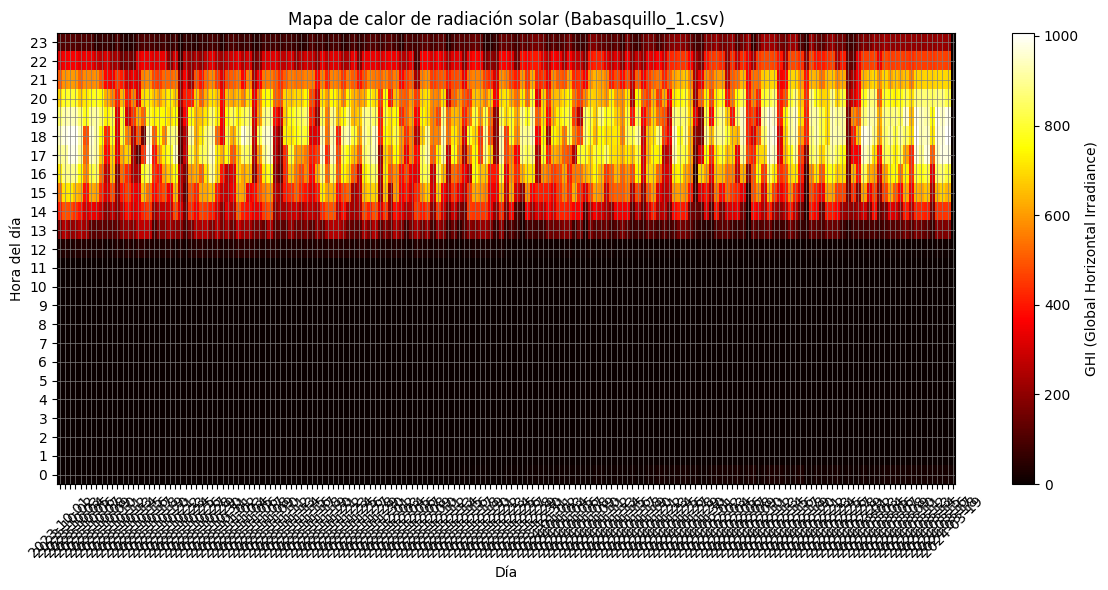

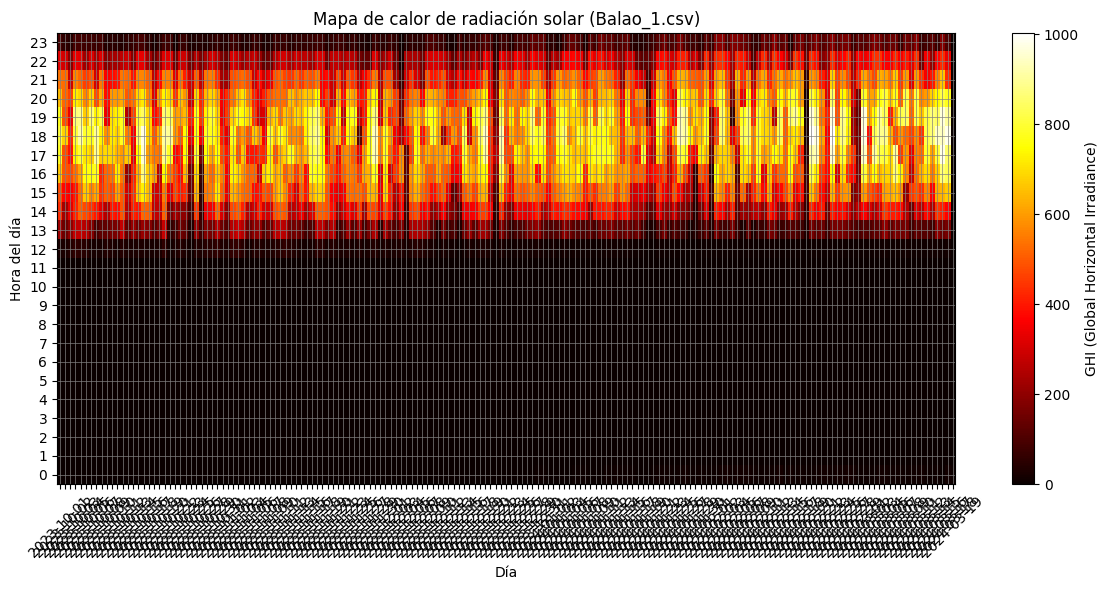

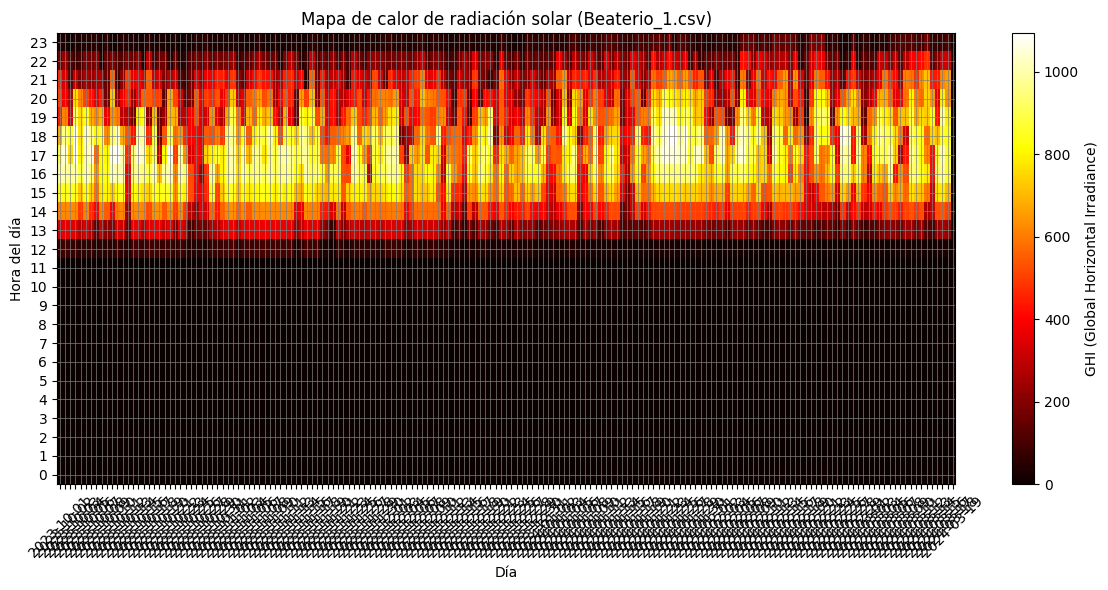

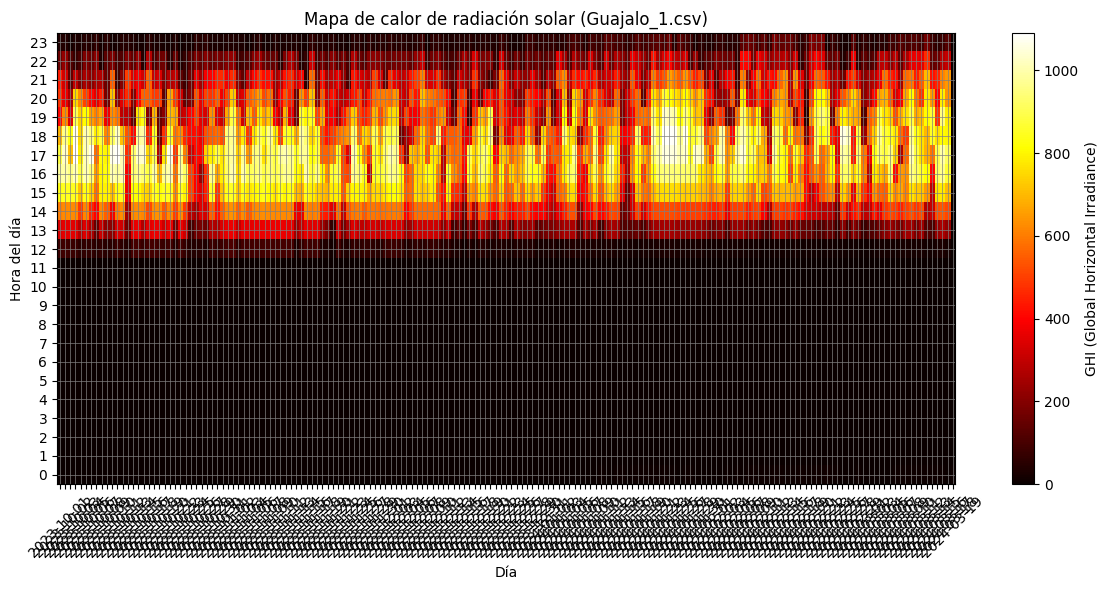

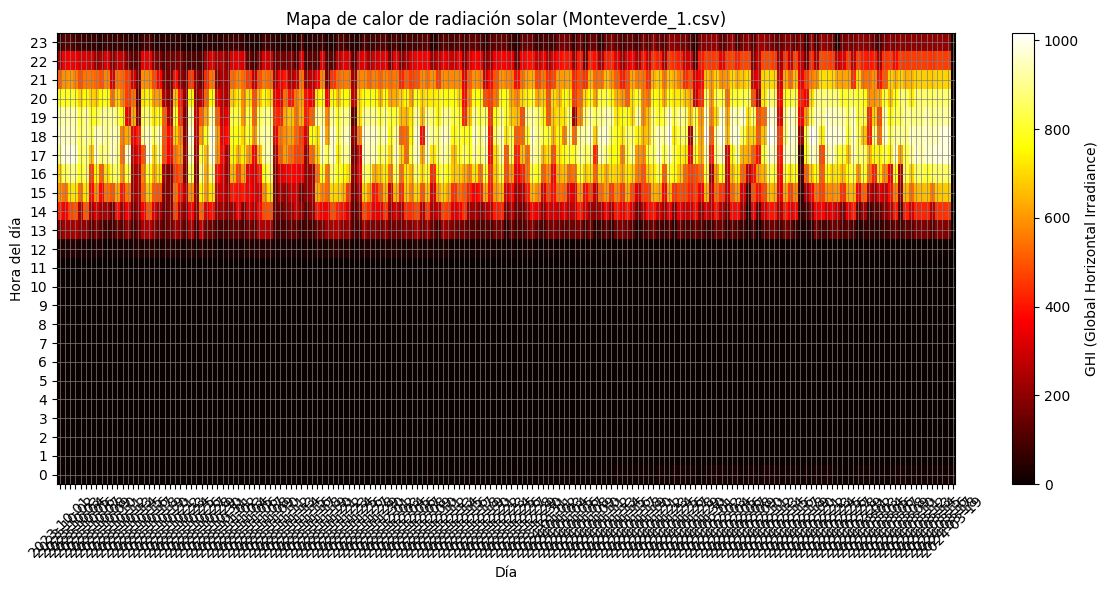

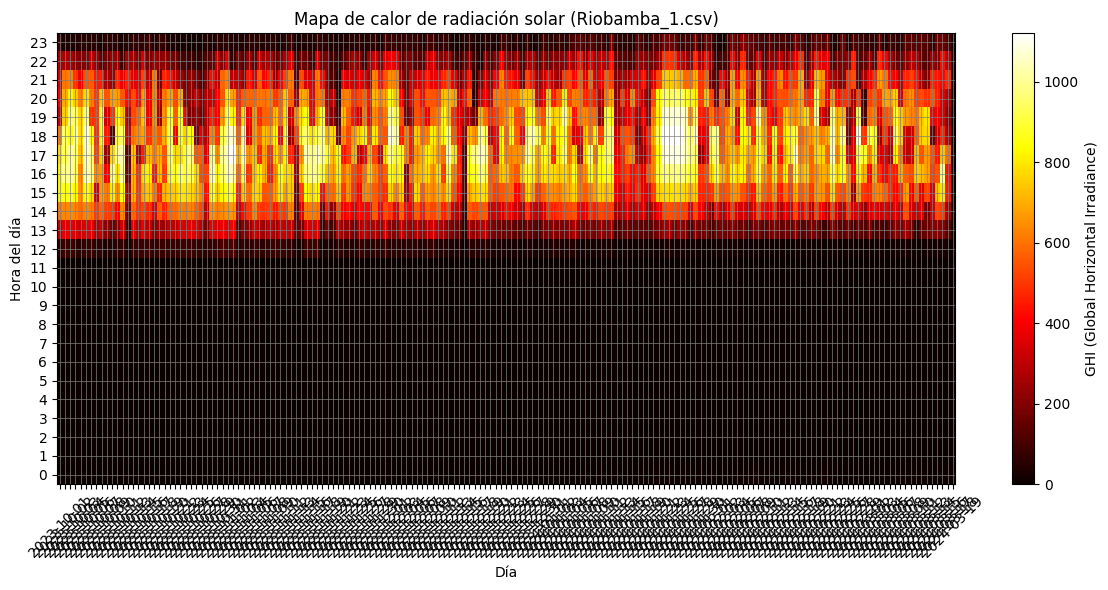

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Leer los datos de todos los archivos CS
archivos_csv_1 = ['Babasquillo_1.csv', 'Balao_1.csv', 'Beaterio_1.csv', 'Guajalo_1.csv', 'Monteverde_1.csv', 'Riobamba_1.csv']

# Iterar sobre cada archivo CSV
for archivo in archivos_csv_1:
    try:
        # Leer el archivo CSV
        df = pd.read_csv(archivo)
        
        # Convertir la columna 'period_end' a datetime
        df['period_end'] = pd.to_datetime(df['period_end'])
        
        # Crear matriz de datos
        num_fechas = len(df['period_end'].dt.date.unique())
        num_horas = 24  # Suponiendo que tenemos 24 horas en un día
        datos = np.zeros((num_horas, num_fechas))
        
        # Llenar la matriz de datos
        for i, fecha in enumerate(sorted(df['period_end'].dt.date.unique())):
            for j in range(num_horas):
                hora = df[(df['period_end'].dt.date == fecha) & (df['period_end'].dt.hour == j)]['ghi'].mean()
                datos[j, i] = hora if not np.isnan(hora) else 0  # Manejo de valores NaN
        
        # Crear el gráfico de mapa de calor
        plt.figure(figsize=(12, 6))
        plt.imshow(datos, cmap='hot', aspect='auto', origin='lower', interpolation='nearest')
        plt.colorbar(label='GHI (Global Horizontal Irradiance)')
        plt.title(f'Mapa de calor de radiación solar ({archivo})')
        plt.xlabel('Día')
        plt.ylabel('Hora del día')
        plt.xticks(np.arange(len(df['period_end'].dt.date.unique())), sorted(df['period_end'].dt.date.unique()), rotation=45)
        plt.yticks(np.arange(num_horas), np.arange(num_horas))
        plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        plt.tight_layout()
        
        # Mostrar el gráfico
        plt.show()
        
    except Exception as e:
        print(f"Error al procesar el archivo '{archivo}': {e}")